# Tasks


These are my solutions to the Tasks assessment for Machine Learning and Statistics in 2020. The author is Katarzyna Chmielowiec-Connell (G00376370@gmit.ie)

***

### Task 1: Calculate a square root

***

In  Python we can calculate the square root of a number in many different ways but in this task the aim is to calculate the square root without using a built in Python library. One of the method that can be used for that purpose is the Netwon' method.

Every real nuber has 2 square roots. The most common analytical methods in finding the square root are iterative and require two steps: finding a suitable starting value, followed by iterative refinement until termination criteria is met. The most suitable method for programmatic calculation is Newton's method which is based on a property of the derivative in the calculus [1, 2, 3, 4].

To find the square root $b$ of a number $x$ we can use the following equation. 

$$ b_{next} = b - \frac{b^2 - x}{2b}  $$

With only a few iterations one can obtain a solution accurate to many decimal places. 



#### Code

In [2]:
# code adopted from https://web.microsoftstream.com/video/0519941d-9f8b-4ae1-8935-6711117cf8fe 

# definition of the function sqrt_2
def sqrt_2(x):
    """
    # A function to calculate a square root of a number  
    """
    # divide x by 2 to get the initial guess (the starting value)
    b = x / 2
    #Loop until happy with the accuracy.
    while abs(x - (b * b)) > 0.001:
        # starting with guess b, calculate a better b guess based on how close squareroot b is to x
        b -= (b * b - x) / (2 * b)
    #Return the (approximate) square root of x.
    return b

##### Tests of the function

Here we test the function with some known values.

In [3]:
#Test the function on number 2
sqrt_2(2)

1.4142156862745099

In [4]:
# import math library to compare the results 
import math
math.sqrt(2)

1.4142135623730951

The function works correctly but it only displays 16 decimal places. To display hundres places, the following code was adopted:

In [5]:
# Code adapt from https://rosettacode.org/wiki/Integer_roots#Python
# defined function sqrt2
def sqrt2(x):

# set y to be a large integer
    y = 2*100**x
# set starting value as 1    
    x_1 = 1 
    
# calculate the second step of approximation    
    x_2 = (x_1 + y // (x_1)) // 2     

    # using while loop get better guess of approximation
    while x_1 != x_2:   
        x_1 = x_2    
        x_2 = (x_2 + y // x_2) // 2
        
#format the result to display decimal places   
    result = f'{x_2  // 10**100}.{x_2  % 10**100:0100d}'
    return result

In [6]:
root = sqrt2(100)
print(root)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


##### Conclusion
In the Newton’s-method we converge towards the desired result but never reach it in a finite number
of steps. How fast we can converge is a key question.



##### References 

[1] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8   

[2] Newton's method; Wikipedia; https://en.wikipedia.org/wiki/Newton%27s_method

[3] Methods of computing square roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[4] Getting started with task assessment; Ian McLoughlin;
https://web.microsoftstream.com/video/0519941d-9f8b-4ae1-8935-6711117cf8fe 

[5] math.mit.edu, "newton-sqrt", [online], https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[6] apod.nasa.gov, "sqrt2", [online], https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil   

[7] Integer Roots [online] https://rosettacode.org/wiki/Integer_roots#Python

***

### Task 2: Chi-squared test  of Independence
***

####  Chi-square test
***
The Chi-Square Test of Independence allow to check if there is an association between categorical variables (i.e., whether the variables are independent or related). It is a nonparametric test. This test is also known as Chi-Square Test of Association.
This test utilizes a contingency table to analyze the data. A contingency table (also known as a cross-tabulation, crosstab, or two-way table) is an arrangement in which data is classified according to two categorical variables. The categories for one variable appear in the rows, and the categories for the other variable appear in columns. Each variable must have two or more categories. Each cell reflects the total count of cases for a specific pair of categories.[8]

After calculation of expected value of the two nominal variables and the test of independence will will be able to conduct hypothesis testing where a test statistic is computed and compared to a critical value. The critical value for the chi-square statistic is determined by the level of significance (typically .05) and the degrees of freedom. If the observed chi-square test statistic is greater than the critical value, the null hypothesis can be rejected.

Null hypothesis: Assumes that there is no association between the two variables.

Alternative hypothesis: Assumes that there is an association between the two variables. [11]

***

#### Wikipedia example

The example of Wikipedia of the Chi-square test describes a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data are tabulated as follow:


               |  A |  B  |   C |  D  |  Total
-----------------------------------------------
White collar   | 90 | 60  | 104 | 95  |  349
Blue collar    | 30 | 50  |  51 | 20  |  151
No collar      | 30 | 40  |  45 | 35  |  150

-----------------------------------------------
Total          |150 |150  | 200 | 150 |  650


From the website we also learn that the Chi-squared value based on it is approximately 24.6 [9]. 

In the task I will use scipy.stats to verify this value and calculate the associated p value. 


#### Code

In [9]:
#import packages
#import pandas for dataframe
import pandas as pd

import matplotlib.pyplot as plt
#import numpy for the arrays of numbers
import numpy as np
#import scipy for the machine learning 
import scipy.stats as ss
#chi-square test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


# plotting style for the plots:
plt.style.use("fivethirtyeight")

# create the table with the arrays of numbers
df = pd.DataFrame([[90,60,104,95,349],[30,50,51,20,151],[30,40,45,35,150],[150,150,200,150,650]], index=["White Collar","Blue Collar","No Collar","Total"], columns=["A","B","C","D","Total"])
print("Data Table")
print(df)

# code adapt from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
# run the chi test to calculate expeted value of 2 nominal variables
stat,p,dof,expected = chi2_contingency(df) 
print("\nStat:",stat) 

# print the p value:
print("p value:",p) # a measure of the probability that an observed difference could have occurred just by random chance#

# print the degree of freedom result 
print('Degrees of freedom: %d \n' % dof)

print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
# assess the result - if statistic >= crticial value, the result is significant, dependency exists, reject null hypothesis (H0)
if abs(stat) >= critical:
	print('Dependent (reject H0)')

#if statistic < crticial value, the result is not significant, dependency does not exist, failed to reject null hypothesis (H0)
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Data Table
                A    B    C    D  Total
White Collar   90   60  104   95    349
Blue Collar    30   50   51   20    151
No Collar      30   40   45   35    150
Total         150  150  200  150    650

Stat: 24.571202858582602
p value: 0.016990737760739776
Degrees of freedom: 12 

dof=12
[[ 80.53846154  80.53846154 107.38461538  80.53846154 349.        ]
 [ 34.84615385  34.84615385  46.46153846  34.84615385 151.        ]
 [ 34.61538462  34.61538462  46.15384615  34.61538462 150.        ]
 [150.         150.         200.         150.         650.        ]]
probability=0.950, critical=21.026, stat=24.571
Dependent (reject H0)
significance=0.050, p=0.017
Dependent (reject H0)


#### Conclusion

The conducted above chi-squared test of independence proved that the statistical value on the Wikipedia page is correct. After the critical value calculation it has been observed that the observed ch-square test statistic is less than the critical value the dependency exists and therfore the null hypothesis can be rejected.

#### References

[8] SPSS Turorials: Chi-Square Test of Independence [online] https://libguides.library.kent.edu/spss/chisquare

[9] Chi-squared tests; Wikipedia; https://en.wikipedia.org/wiki/Chi-squared_test

[10] Chi-squared test for machine learning; https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

[11] Chi-Square Test of Independence; https://www.statisticssolutions.com/non-parametric-analysis-chi-square/

***

### Task 3: Standard deviation simulation in Numpy

### Standard Deviation

The standard deviation represents a measure of the spread of scores within a data set. The standard deviation of a population represent uefule data but as we are often presented with data from a sample only, we can estimate the population standard deviation from a sample standard deviation. The sample and population standard deviations are calculated differently.

There are six standard deviation formulas in Excel (eight if you consider database functions as well).[13]

![](Excelshot.PNG)

When calculating the sample standard deviation the formulas like STDEV.S, STDEVA, and STDEV can be used.
Calculating the standard deviation for an entire population on the other hand would involve selecting between STDEV.P, STDEVPA, and STDEVP functions [14].

For the purpose of this exerice I will research the difference between STDEV.S abd STDEV.P. 


#### STDEV.P vs STDEV.S

When all we have is a sample, but we need to make a statement about the population standard deviation from which the sample is drawn, we need to use the sample standard deviation STDEV.S,

STDEV.S(number1,[number2],...) is a Statistical function that calculates and returns the standard deviation for a sample of data. It calculates standard deviation using the “n-1” method and it has the following arguments:

Number1     Required. The first number argument corresponding to a sample of a population. You can also use a single array or a reference to an array instead of arguments separated by commas.

Number2, ...     Optional. Number arguments 2 to 254 corresponding to a sample of a population. You can also use a single array or a reference to an array instead of arguments separated by commas.[14]

To calculate STDEV S we can use the following formula [15]:



![](STDEVS.PNG)

where x is the sample mean AVERAGE(number1,number2,…) and n is the sample size.
where,

$\sum$ = sum of...
    
_<br>x = sample mean<br>
    n = number of scores in sample.[16]

If we have the entire population or a sample of a larger population, but we are only interested in this sample and do not wish to generalize our findings to the population we would use STDEV.P to calculate the population standard deviation. 


STDEV.P(number1,[number2],...) is used to calculate standard deviation using the entire population given as arguments (ignores logical values and text).

Similarly to STDEV.S the STDEV.P has required and optional arguments:

Number1     Required. The first number argument corresponding to a population.

Number2, ...     Optional. Number arguments 2 to 254 corresponding to a population. You can also use a single array or a reference to an array instead of arguments separated by commas.

The following formula is used to calculate STDEV.P:[17]


![](STDEVP.PNG)

where x is the sample mean AVERAGE(number1,number2,…) and n is the sample size.

The standard deviation is the square root of the average of the squared deviations from the mean, i.e., std = sqrt(mean(x)), where x = abs(a - a.mean())**2.

The average squared deviation is usually calculated as x.sum() / N, where N = len(x). However, if ddof (Delta Degrees of Freedom) is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables [18]. As STDEV.S uses n-1 it is unbiased estimator which make it preferred choice.

Lets check it on an example:





The standard deviation, which computes the standard deviation along the specified axis, is the square root of the average of the squared deviations from the mean, for example:
std = sqrt(mean(abs(x - x.mean())**2)).

### Numpy.std
Numpy.std returns the standard deviation, a measure of the spread of a distribution, of the array elements. The standard deviation is computed for the flattened array by default, otherwise over the specified axis.[12]

#### Parameters
#### a - array_like
Calculate the standard deviation of these values.

#### axis -> none or int or tuple of ints, optional
Axis or axes along which the standard deviation is computed. The default is to compute the standard deviation of the flattened array.

#### dtype -> dtype, optional
Type to use in computing the standard deviation. For arrays of integer type the default is float64, for arrays of float types it is the same as the array type.

#### out -> ndarray, optional
Alternative output array in which to place the result. It must have the same shape as the expected output but the type (of the calculated values) will be cast if necessary.

#### ddof (Delta Degrees of Freedom) -> int, optional
The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.

#### keepdims -> bool, optional
If set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

If the default value is passed, then keepdims will not be passed through to the std method of sub-classes of ndarray, however any non-default value will be. If the sub-class’ method does not implement keepdims any exceptions will be raised.

#### where -> array_like of bool, optional
Elements to include in the standard deviation.

#### Returns standard_deviation -> ndarray, see dtype parameter above.
If out is None, return a new array containing the standard deviation, otherwise return a reference to the output array [12].



#### Code

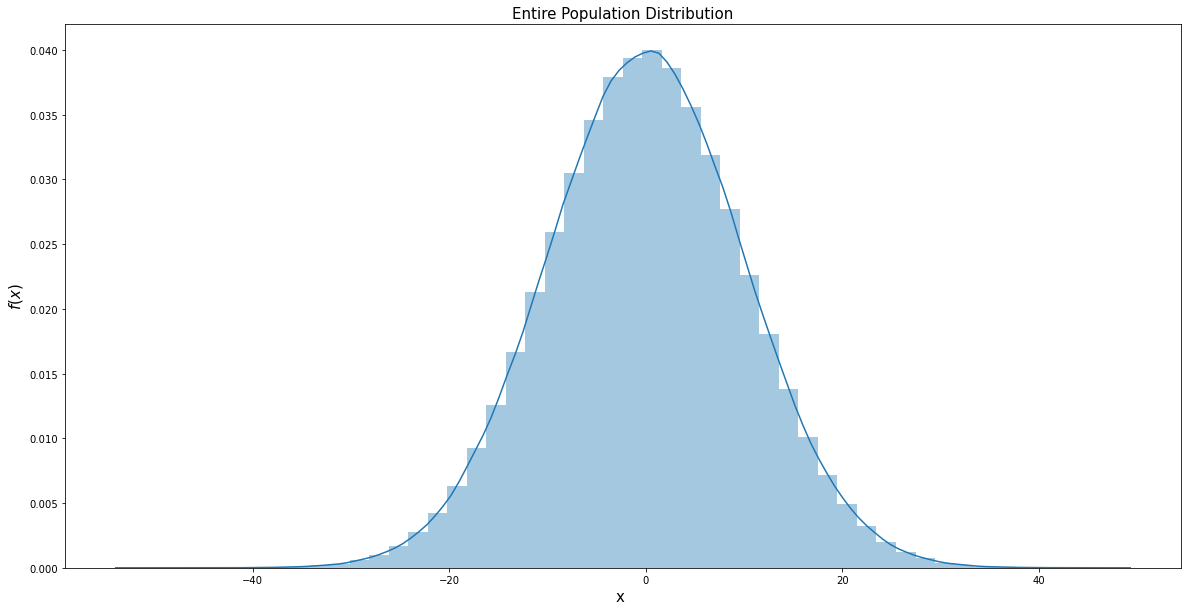

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define STDEV.S function
def stdev_s(x):
    rs = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))
    return rs

# define STDEV.P 
def stdev_p(x):
    rp = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
    return rp

# Draw random samples from a normal distribution.
np.random.seed(10)

# generate random data for a full population using np.random.normal 
mean = 0
standard_deviation = 10
entire_population = np.random.normal(mean,standard_deviation,1000000)

plt.figure(figsize=(20,10))

sns.distplot(entire_population)

# set labels and title
plt.xlabel('x ', fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.title('Entire Population Distribution', fontsize = 15)

plt.show()

In [6]:
#STDEV.P as standard deviation for entire population
standard_deviation_entire = stdev_p(entire_population)
print("Standard Deviation for entire population (STDEV.P): ",round(standard_deviation_entire,8))

Standard Deviation for entire population (STDEV.P):  9.99731591


In [7]:
# STDEV.S - variant I: on a sample size of 400 from dataset 

# Create a sample data by using np.random.choice() function 
number_of_samples = 400

sample_population = np.random.choice(entire_population, number_of_samples)
np.random.shuffle(sample_population)

# calculate standarde deviation by calling created previously function
STDEV_S = stdev_s(sample_population)

# print result

print("Standard Deviation for sample data (STDEV.S): ",round(STDEV_S,8))

Standard Deviation for sample data (STDEV.S):  10.38437599


In [8]:
# STDEV.S - variant I: on a sample size of 60 from dataset 

# Create a sample data by using np.random.choice() function 
number_of_samples = 60

sample_population = np.random.choice(entire_population, number_of_samples)
np.random.shuffle(sample_population)

# calculate standarde deviation by calling created previously function
STDEV_S = stdev_s(sample_population)

# print result

print("Standard Deviation for sample data (STDEV.S): ",round(STDEV_S,8))

Standard Deviation for sample data (STDEV.S):  10.20099329


In [9]:
# STDEV.S - variant I: on a sample size of 10000 from dataset 

# Create a sample data by using np.random.choice() function 
number_of_samples = 10000

sample_population = np.random.choice(entire_population, number_of_samples)
np.random.shuffle(sample_population)

# calculate standarde deviation by calling created previously function
STDEV_S = stdev_s(sample_population)

# print result

print("Standard Deviation for sample data (STDEV.S): ",round(STDEV_S,8))

Standard Deviation for sample data (STDEV.S):  10.06062935


### Conclusion

Choosing betweem use of STDEV.S and STDEV.P can be confusing, mainly because name "sample" standard deviation is incorrectly being interpreted as meaning the standard deviation of the sample itself and not the estimate of the population standard deviation based on the sample. 

#### References

[12] Nupmy.std; https://numpy.org/doc/stable/reference/generated/numpy.std.html

[13] TrumpExcel; How to Calculate Standard Deviation in Excel (Step-by-Step); https://trumpexcel.com/standard-deviation/

[14] Spreadsheetweb.com; Function: STDV.S; https://www.spreadsheetweb.com/excel-stdev-s-function/

[15] STDEV.S function; Microsoft support; https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[16] LaTex; https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

[17] STDEV.P function; Microsoft Support; https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[18] Numpy.std; Numpy.org; https://numpy.org/devdocs/reference/generated/numpy.std.html

[19]Standard Deviation; https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

***

### Task 4: K Nearest Neighbours clustering on Iris data set using Scikit learn

From the sklearn documentation
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

#### Scikit learn

Scikit learn is a development led by interational community. Initially started in 2007 as a Google Summer of Code project by David Cornapeau, within few years it became simple and efficient tool for predictive data analysis.Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

#### K Nearest Neighbours

K-Nearest Neighbor algorithm is a standard machine learning method which is a good example of an algorithm that is a general approximator for relationships among a set of data. The algorithm makes no assumptions about the relationships among the data, but uses the data alone to make new predictions with observed data which makes it popular choice in the large-scale data mining efforts. This algorithm finds exemplars among the observations that are most like the new data presented to the algorithm, and then assigns to the new data point the predicted value of the exemplar most similar to it.
Conceptually, each point is plotted in a high-dimensional space, where each axis in the space corresponds to an individual variable. When we have a new (test) data point, we want to find out the K nearest neighbors that are closest (ie, most “similar” to it). The number K is typically chosen as the square root of N, the total number of points in the training data set. (Thus, if N is 400, K = 20).[20]



In [16]:
# Import Numpy library for mathematical functions
import numpy as np

# Import Pandas library to analyze the data
import pandas as pd   

# imprt matplotlib for data visualzation
import matplotlib.pyplot as plt

# To download iris dataset in the form of a Pandas DataFrame import the seaborn library
import seaborn as sns 

# Load Iris dataset using sklearn
from sklearn.datasets import load_iris

# Define Iris data as Panda Dataframe
seadf = sns.load_dataset('iris')
# Use shape command to check how many instances(rows) and attributes (columns) the set contains and what are the species proportions
# code adoped from https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
print(seadf.shape)
print(seadf.groupby('species').size())

# Use 'Head' and 'Tail' commands to print first 20 rows to see the format of data
# code adopted from https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
print(seadf.head(10))
print(seadf.tail(10))

#To give a statistical summary about the dataset (mean, maximum, minimum and devation figures)
#Code adopted from https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
print(seadf.describe()) 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#K-NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

generateClassificationReport(y_test,y_pred)

(150, 5)
species
setosa        50
versicolor    50
virginica     50
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142     

NameError: name 'x' is not defined

In [17]:
#### Data set

In [ ]:
[Iris Data Analysis and machine learning] https://www.kaggle.com/gopaltirupur/iris-data-analysis-and-machine-learning-python

#### References

[20] K Nearest Neighbor; Science Direct; https://www.sciencedirect.com/topics/immunology-and-microbiology/k-nearest-neighbor